# ***Transferencias Internas - Empresa de Retail***

El presente trabajo tiene como objetivo llevar adelante un análisis exploratorio y visual sobre el movimiento de transferencias internas de productos en una empresa del sector retail.

Para ello, se utilizará un dataset que recopila los registros de más de 100.000 transferencias realizadas entre distintas sucursales y centros logísticos de la organización durante el año 2024. La base contiene información relevante como el rubro de los productos transferidos, la cantidad de unidades trasladadas, el volumen físico transportado, el peso de los productos, los costos unitarios y totales asociados, así como los orígenes y destinos de cada operación.

La elección de este dataset responde a su riqueza en variables operativas y comerciales, lo que permite abordar diversas dimensiones del movimiento de stock interno de la compañía. Además, el volumen de registros y la variedad de categorías disponibles hacen posible construir visualizaciones significativas y desarrollar análisis multivariados, en línea con los objetivos propuestos para esta práctica integradora.

El análisis se centrará en identificar cuáles son los rubros de productos más relevantes en términos de cantidad transferida, volumen transportado y costo total generado, además de analizar la distribución de estos movimientos entre las distintas sucursales de destino.

Si bien complementar el análisis con información de ventas por sucursal hubiese ampliado las posibilidades de exploración y profundidad, por motivos de sensibilidad de los datos se decidió no incluir dicha información en esta etapa.

Desde el punto de vista metodológico, el trabajo combinará la exploración descriptiva de los datos —a través de estadísticas básicas y análisis de valores faltantes— con la construcción de visualizaciones gráficas mediante las librerías Matplotlib y Seaborn de Python.

Se generarán gráficos univariados, bivariados y multivariados, incorporando parámetros adicionales que contribuyan a mejorar la legibilidad y el valor analítico de los charts, tales como grid, hue, palette, y ajustes de estilo en ejes y etiquetas. Cada visualización irá acompañada de su interpretación correspondiente, buscando siempre dar respuesta a las preguntas e hipótesis planteadas.

Este enfoque integral garantizará que el análisis no solo sea visualmente atractivo, sino también sólidamente fundamentado en datos, aportando insights útiles para comprender la dinámica operativa de la empresa y apoyar la toma de decisiones estratégicas.


 -----------------------------------------------------------------------------------------------------------------------------------------------------


# ***Preguntas de Interes***

- ¿Qué rubros concentran la mayor cantidad transferida, el mayor volumen transportado y el mayor costo total en el conjunto de transferencias internas realizadas durante 2024?

- ¿La distribución de los principales rubros transferidos varía
significativamente entre las distintas sucursales de destino?

- ¿Existen sucursales donde predominen ciertos rubros específicos en términos de volumen, costo o cantidad transferida?

- ¿Cómo se comporta el costo total y el volumen transferido según el rubro predominante en cada sucursal?



Estas preguntas orientarán la construcción de los gráficos y resúmenes numéricos, con el objetivo de explorar la dinámica de transferencias internas considerando tanto la categoría de los productos (rubro) como su destino logístico (sucursal).

 ----------------------------------------------------------------------------------------------------------------------------------------------------- -----------------------------------------------------------------------------------------------------------------------------------------------------


# ***Hipótesis de Análisis***


**Hipótesis Nula (H₀):**  
La distribución desde el centro de operaciones logísticos de los rubros que concentran el mayor costo, cantidad y volumen transferido no presenta diferencias significativas entre las distintas sucursales de destino durante 2024.

**Hipótesis Alternativa (H₁):**  
La distribución desde el centro de operaciones logísticos de los rubros que concentran el mayor costo, cantidad y volumen transferido varía significativamente entre las distintas sucursales de destino durante 2024.


Estas hipótesis guiarán la construcción de las visualizaciones y los resúmenes numéricos, orientando el análisis a detectar patrones o diferencias en el comportamiento de transferencias internas entre rubros y sucursales.


 ----------------------------------------------------------------------------------------------------------------------------------------------------- -----------------------------------------------------------------------------------------------------------------------------------------------------


In [1]:
# En primer lugar se importaran las librerias necesarias para avanzar con el análisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos los graficos para que se vean directamente en la notebook

%matplotlib inline

# Configuramos un estilo visual unico para todos los graficos de Seaborn
sns.set(style="whitegrid")

In [2]:
# Cargamos el DataSet seleccionado alojado en GitHub

url = 'https://raw.githubusercontent.com/aparajon89/ProyectoDS-CODER-Parajon/main/DataSet/Coder_DATASET_DS_APARAJON.csv'

df = pd.read_csv(url, encoding='latin1', sep=';')

# Mostramos las dimensiones del mismo

print(f'El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.') # Verificamos que cumple con las condiciones de la consiga

# Realizamos una primera visualización del mismo

df.head()



El dataset tiene 119760 filas y 21 columnas.


,Fecha,Hora,Comprobante,Origen,Destino,Estado,Emitido por,Codigo,Articulo,Modelo,...,Costo Unit.,Costo Total,Tipo de envio,Dia,Camion,Volumen,Peso,Familia,Rubro,Proveedor
0,2/1/2024,17:16:00,RE. 0036-00602117-R,Centro de Operaciones Logistic,Cafayate,Confirmado en Destino,ZATO JAVIER,101515,VENDAS TOPPER ELASTICAS 141730 Nø5,141730,...,"1509,5","3018,99",REPOSICION,martes,Camion 1,"0,0001",1,INDUMENTARIA,ACCESORIOS DE FUTBOL,TOPPER ARGENTINA S.A.
1,2/1/2024,09:39:00,RE. 0036-00602030-R,Centro de Operaciones Logistic,Lules,Confirmado en Destino,VERGARA ANGEL MARTIN BENITO\n,97990,CORTA PASTA BRINOX 2221-319- ASTI NEGRO,2221/319,...,"4374,82","4374,82",REPOSICION,martes,Camion 1,"0,0001","0,5",BAZAR,VARIOS,LUMINATEC S.R.L.
2,2/1/2024,12:39:00,RE. 0036-00602067-R,Centro de Operaciones Logistic,Aguilares,Confirmado en Destino,ZATO JAVIER,107202,AURICULARES GAMER LENOVO XT82,XT 82,...,"16425,34","16425,34",REPOSICION,martes,Camion 2,"0,0005",0,AUDIO,AURICULAR,COFRAD SA
3,2/1/2024,17:16:00,RE. 0036-00602117-R,Centro de Operaciones Logistic,Cafayate,Confirmado en Destino,ZATO JAVIER,107202,AURICULARES GAMER LENOVO XT82,XT 82,...,"16425,34","16425,34",REPOSICION,martes,Camion 1,"0,0005",0,AUDIO,AURICULAR,COFRAD SA
4,2/1/2024,09:39:00,RE. 0036-00602030-R,Centro de Operaciones Logistic,Lules,Confirmado en Destino,VERGARA ANGEL MARTIN BENITO\n,107202,AURICULARES GAMER LENOVO XT82,XT 82,...,"16425,34","16425,34",REPOSICION,martes,Camion 1,"0,0005",0,AUDIO,AURICULAR,COFRAD SA


In [3]:
# Análisis de valores faltantes o nulos

# Contaremos la cantidad de valores nulos por columna

missing_values = df.isnull().sum()

# A su vez para tener una lectura mas clara, filtraremos las columnas que tengas valores faltantes

missing_values = missing_values[missing_values > 0]

# Mostramos los resultados

if not  missing_values.empty:
    print("Columnas con valores nulos:")
    print(missing_values)
else:
    print("No hay valores nulos en el DataFrame.")


Columnas con valores nulos:
Modelo    6326
dtype: int64


# ***Tratamiento de valores nulos/faltantes***

Se detectó la presencia de valores nulos en la columna **"Modelo"**.  
Sin embargo, esta columna no resulta relevante para el presente análisis, dado que cada producto ya se encuentra correctamente identificado mediante su **código interno**.

Considerando que:
- El código de producto es único y suficiente para su identificación,
- El "Modelo" no agrega información adicional para las preguntas planteadas ni para las hipótesis del estudio,
- Y que completar esta columna no aportaría valor al análisis de transferencias, costos, volúmenes ni rubros,

Se decidió **no tratar ni completar los valores nulos de la columna "Modelo"**.

El análisis continuará utilizando las demás variables relevantes del dataset.

In [4]:
# Tratamiento de tipo de datos - Información

df.dtypes

,0
Fecha,object
Hora,object
Comprobante,object
Origen,object
Destino,object
Estado,object
Emitido por,object
Codigo,int64
Articulo,object
Modelo,object


In [5]:
# Conversión de tipo datos

# En primer lugar convertiremos las columnas que estan cargadas como "Object" pero deberian estar cargado con formato numerico float

columnas_numericas = ['Costo Unit.', 'Costo Total', 'Volumen', 'Peso']

# Los decimales en el DataSet estan separados por ',', entonces lo reemplazamos por '.' y convertimos a float
for col in columnas_numericas:
    df[col] = df[col].str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# En segundo lugar convertimos la columna Fecha a este tipo de formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')

# Por ultimo verificamos los cambios

print(df.dtypes)

Fecha            datetime64[ns]
Hora                     object
Comprobante              object
Origen                   object
Destino                  object
Estado                   object
Emitido por              object
Codigo                    int64
Articulo                 object
Modelo                   object
Cantidad                  int64
Costo Unit.             float64
Costo Total             float64
Tipo de envio            object
Dia                      object
Camion                   object
Volumen                 float64
Peso                    float64
Familia                  object
Rubro                    object
Proveedor                object
dtype: object


In [6]:
# Corrección de nombres en columnas Origen y Destino

# Definimos las correcciones
correcciones = {
    'Banda de R¡o Sali': 'Banda del Rio Sali',
    'Concepci¢n': 'Concepcion',
    'Santa Mar¡a': 'Santa Maria'
}

# Aplicamos las correcciones
df['Origen'] = df['Origen'].replace(correcciones)
df['Destino'] = df['Destino'].replace(correcciones)

# Verificación
verificacion = pd.DataFrame({
    'Origen': sorted(df['Origen'].unique()),
    'Destino': sorted(df['Destino'].unique())
})

# Mostramos la tabla ordenada
verificacion

,Origen,Destino
0,25 de Mayo,25 de Mayo
1,Aguilares,Aguilares
2,Banda del Rio Sali,Banda del Rio Sali
3,Big,Big
4,Cafayate,Cafayate
5,Centro de Operaciones Logistic,Centro de Operaciones Logistic
6,Concepcion,Concepcion
7,Famailla,Famailla
8,Lules,Lules
9,Maipu,Maipu


# ***Segmentación del Análisis***

## Filtrado del Dataset para Análisis

Con el objetivo de centrar el análisis en las transferencias logísticas relevantes, se decidió considerar únicamente aquellas transferencias cuyo **origen** corresponde al **"Centro de Operaciones Logístico"**.

La decisión se fundamenta en que:
- El propósito del análisis es evaluar el movimiento de productos desde el centro principal hacia las sucursales comerciales de la empresa.

- Incluir transferencias originadas en otras sucursales o depósitos secundarios introduciría sesgos en el análisis, ya que podrían tratarse de movimientos internos no comparables (como transferencias entre sucursales o devoluciones).

- Al limitar el análisis a transferencias provenientes del Centro de Operaciones Logístico, se garantiza la comparación homogénea entre las **16 sucursales de destino**, que son el foco real del estudio.

Por lo tanto, se aplicó un filtro al dataset, seleccionando solo las transferencias cuyo campo **"Origen"** sea igual a **"Centro de Operaciones Logístico"**.  
Todo el análisis posterior (gráficos, resúmenes numéricos e interpretaciones) se basará en este conjunto de datos filtrado.


In [7]:
# Filtrar solo transferencias que tienen origen en el Centro de Operaciones Logistic
df_filtrado = df[df['Origen'] == 'Centro de Operaciones Logistic']

# Verificar cantidad de sucursales destino únicas
print(f"Sucursales destino únicas: {df_filtrado['Destino'].nunique()}")

# Mostrar sucursales destino como una columna ordenada alfabéticamente
sucursales_destino = pd.DataFrame(df_filtrado['Destino'].unique(), columns=['Sucursal de Destino'])
sucursales_destino = sucursales_destino.sort_values(by='Sucursal de Destino').reset_index(drop=True)

# Mostramos la tabla
sucursales_destino

Sucursales destino únicas: 16


,Sucursal de Destino
0,25 de Mayo
1,Aguilares
2,Banda del Rio Sali
3,Big
4,Cafayate
5,Concepcion
6,Famailla
7,Lules
8,Maipu
9,Monteros


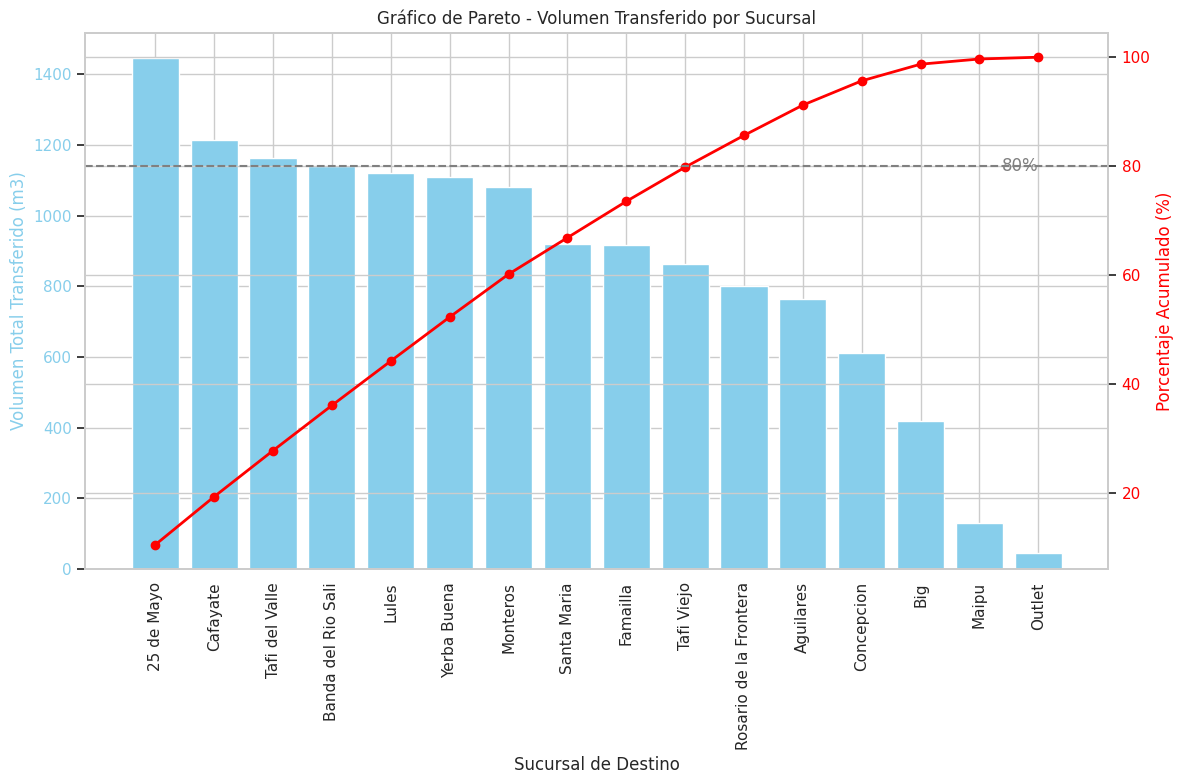

In [8]:
# Análisis de Pareto - Volumen Transferido por sucursal

# Dataset agrupado y ordenado (ya lo teníamos)
volumen_por_destino = df_filtrado.groupby('Destino')['Volumen'].sum().sort_values(ascending=False)

# Calculamos el porcentaje acumulado
cumulative_percentage = volumen_por_destino.cumsum() / volumen_por_destino.sum() * 100

# Creamos el gráfico
fig, ax1 = plt.subplots(figsize=(12,8))

# Barras (Volumen)
ax1.bar(volumen_por_destino.index, volumen_por_destino.values, color='skyblue')
ax1.set_xlabel('Sucursal de Destino')
ax1.set_ylabel('Volumen Total Transferido (m3)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
plt.xticks(rotation=90)

# Curva Pareto (Porcentaje acumulado)
ax2 = ax1.twinx()
ax2.plot(volumen_por_destino.index, cumulative_percentage, color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Porcentaje Acumulado (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Líneas de referencia (por ejemplo 80%)
ax2.axhline(80, color='gray', linestyle='--')
ax2.text(len(volumen_por_destino)-1, 80, '80%', color='gray', va='center', ha='right')

# Título
plt.title('Gráfico de Pareto - Volumen Transferido por Sucursal')

# Mostrar
plt.grid(True)
plt.tight_layout()
plt.show()

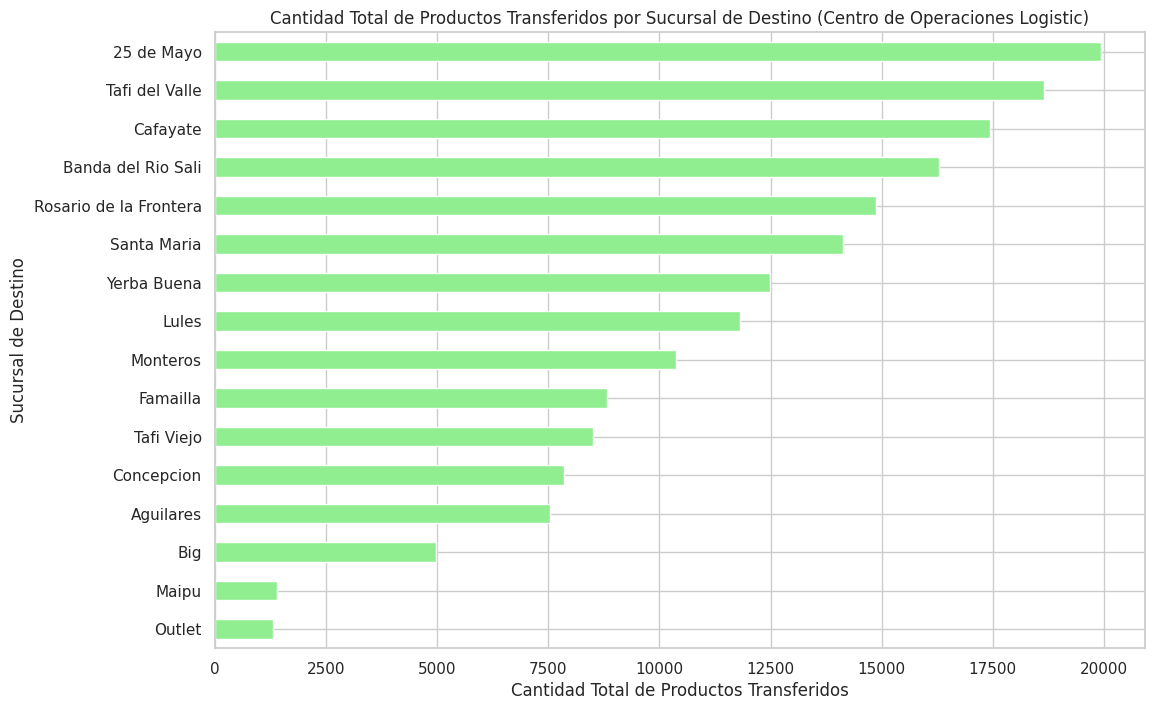

In [9]:
# Analisis de cantidad de productos transferidos por sucursal

# Agrupar cantidad de transferencias por sucursal de destino
transferencias_por_destino = df_filtrado.groupby('Destino')['Cantidad'].sum().sort_values(ascending=False)

# Crear el gráfico
plt.figure(figsize=(12,8))
transferencias_por_destino.plot(kind='barh', color='lightgreen', grid=True)

# Etiquetas y título
plt.xlabel('Cantidad Total de Productos Transferidos')
plt.ylabel('Sucursal de Destino')
plt.title('Cantidad Total de Productos Transferidos por Sucursal de Destino (Centro de Operaciones Logistic)')

# Invertimos el eje Y
plt.gca().invert_yaxis()

# Mostrar
plt.show()


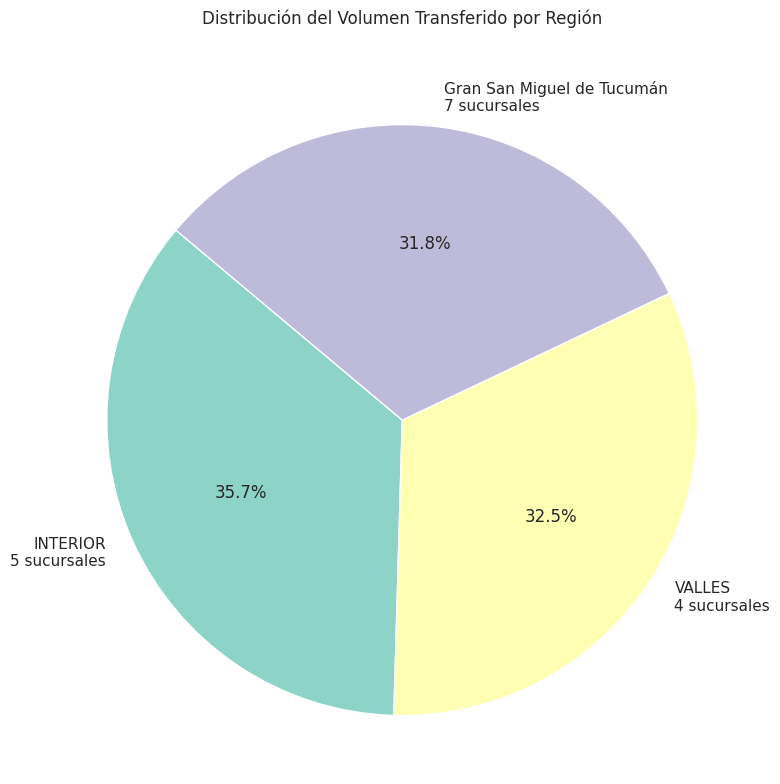

In [10]:
# ANÁLISIS POR REGIONES

# 1. Filtrar sólo transferencias que tienen origen en el Centro de Operaciones Logistic
df_filtrado = df[df['Origen'] == 'Centro de Operaciones Logistic'].copy()

# 2. Crear el mapeo manual de regiones (con nombre completo)
region_mapping = {
    '25 de Mayo': 'Gran San Miguel de Tucumán',
    'Aguilares': 'INTERIOR',
    'Banda de Rio Sali': 'Gran San Miguel de Tucumán',
    'Big': 'Gran San Miguel de Tucumán',
    'Cafayate': 'VALLES',
    'Concepcion': 'INTERIOR',
    'Famailla': 'INTERIOR',
    'Lules': 'INTERIOR',
    'Maipu': 'Gran San Miguel de Tucumán',
    'Monteros': 'INTERIOR',
    'Outlet': 'Gran San Miguel de Tucumán',
    'Rosario de la Frontera': 'VALLES',
    'Santa Maria': 'VALLES',
    'Tafi del Valle': 'VALLES',
    'Tafi Viejo': 'Gran San Miguel de Tucumán',
    'Yerba Buena': 'Gran San Miguel de Tucumán'
}

# 3. Asignar la región a cada sucursal
df_filtrado['Region'] = df_filtrado['Destino'].map(region_mapping)

# 4. Agrupar volumen transferido por Región
volumen_por_region = df_filtrado.groupby('Region')['Volumen'].sum().sort_values(ascending=False)

# 5. Contar cantidad de sucursales por región
df_regiones = pd.DataFrame(list(region_mapping.items()), columns=['Sucursal', 'Region'])
sucursales_por_region = df_regiones['Region'].value_counts()

# 6. Crear etiquetas con nombre + cantidad de sucursales
labels = [f"{region}\n{sucursales_por_region[region]} sucursales" for region in volumen_por_region.index]

# 7. Crear el gráfico de torta mejorado

plt.figure(figsize=(8,8))
plt.pie(volumen_por_region, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribución del Volumen Transferido por Región', pad=30)  # Separación del título
plt.axis('equal')  # Círculo perfecto
plt.tight_layout()
plt.show()

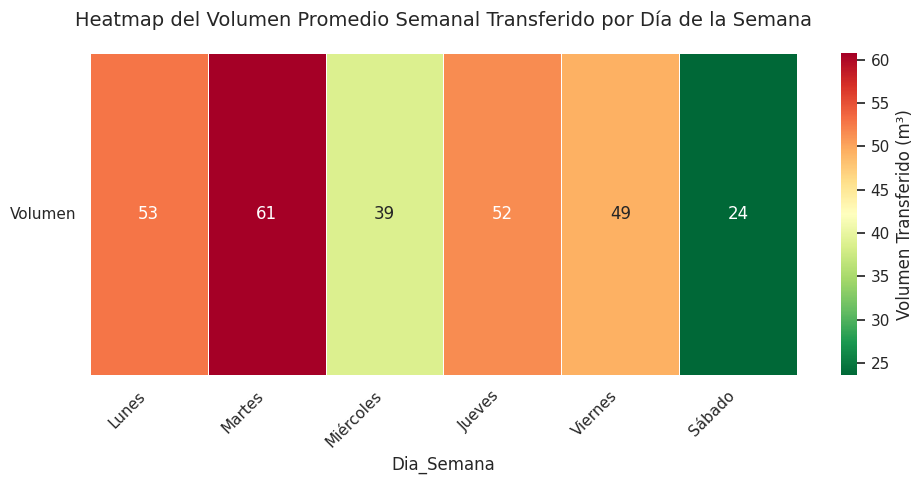

In [11]:
# DISTRIBUCIÓN DE TRANSFERENCIAS POR DÍA DE LA SEMANA

# 1. Crear columnas necesarias
dias_esp = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df_filtrado['Dia_Semana'] = df_filtrado['Fecha'].dt.day_name().map(dias_esp)
df_filtrado['Semana_Año'] = df_filtrado['Fecha'].dt.isocalendar().week

# 2. Agrupar volumen transferido total por Semana y Día
volumen_semanal_dia = df_filtrado.groupby(['Semana_Año', 'Dia_Semana'])['Volumen'].sum().reset_index()

# 3. Calcular volumen promedio por Día de la Semana
volumen_promedio_dia = volumen_semanal_dia.groupby('Dia_Semana')['Volumen'].mean().reset_index()

# 4. Ordenar días de la semana
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
volumen_promedio_dia['Dia_Semana'] = pd.Categorical(volumen_promedio_dia['Dia_Semana'], categories=orden_dias, ordered=True)
volumen_promedio_dia = volumen_promedio_dia.sort_values('Dia_Semana')

# 5. Transformar para Heatmap
volumen_heatmap = volumen_promedio_dia.set_index('Dia_Semana').T

# 6. Crear el Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(
    volumen_heatmap,
    annot=True,
    fmt=".0f",
    cmap="RdYlGn_r",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Volumen Transferido (m³)'}
)
plt.title('Heatmap del Volumen Promedio Semanal Transferido por Día de la Semana', fontsize=14, pad=20)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

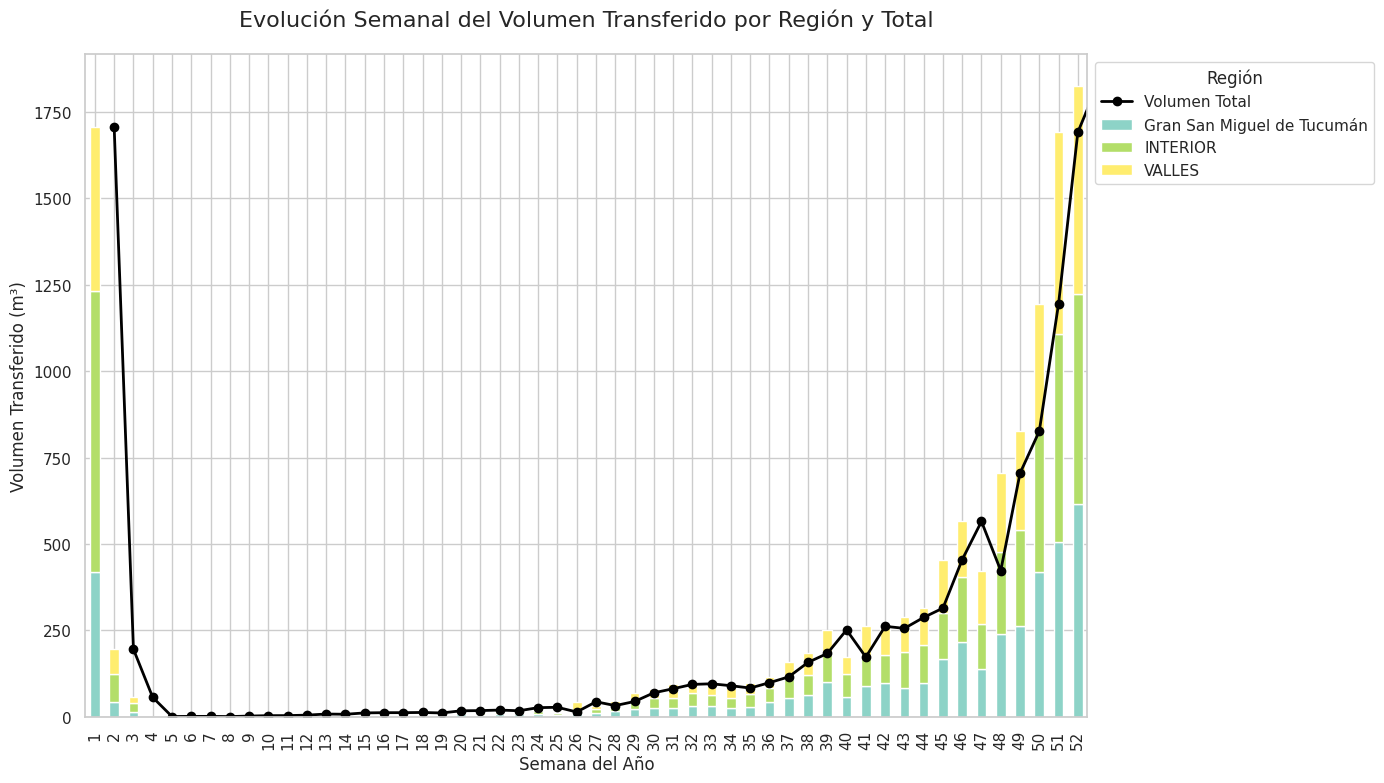

In [12]:
# ANÁLISIS TEMPORAL DE TRANSFERNCIAS POR SEMANA Y REGIÓN

# 1. Crear columnas necesarias
# (Aseguramos que 'Semana_Año' y 'Region' existan)
df_filtrado['Semana_Año'] = df_filtrado['Fecha'].dt.isocalendar().week

# 2. Agrupar volumen total por Semana y Región
volumen_semana_region = df_filtrado.groupby(['Semana_Año', 'Region'])['Volumen'].sum().reset_index()

# 3. Pivotear para tener Regiones como columnas
volumen_pivot = volumen_semana_region.pivot(index='Semana_Año', columns='Region', values='Volumen').fillna(0)

# 4. Calcular volumen total semanal
volumen_total_semana = volumen_pivot.sum(axis=1)

# 5. Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(14,8))

# 5a. Barras apiladas
volumen_pivot.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    colormap='Set3',  # Paleta de colores suave
    legend=True
)

# 5b. Línea del volumen total
ax1.plot(
    volumen_total_semana.index,
    volumen_total_semana.values,
    color='black',
    marker='o',
    linewidth=2,
    label='Volumen Total'
)

# 6. Ajustes de etiquetas y título
ax1.set_xlabel('Semana del Año')
ax1.set_ylabel('Volumen Transferido (m³)')
ax1.set_title('Evolución Semanal del Volumen Transferido por Región y Total', fontsize=16, pad=20)
ax1.grid(True, axis='y')

# 7. Ajustar leyenda
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title="Región", loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

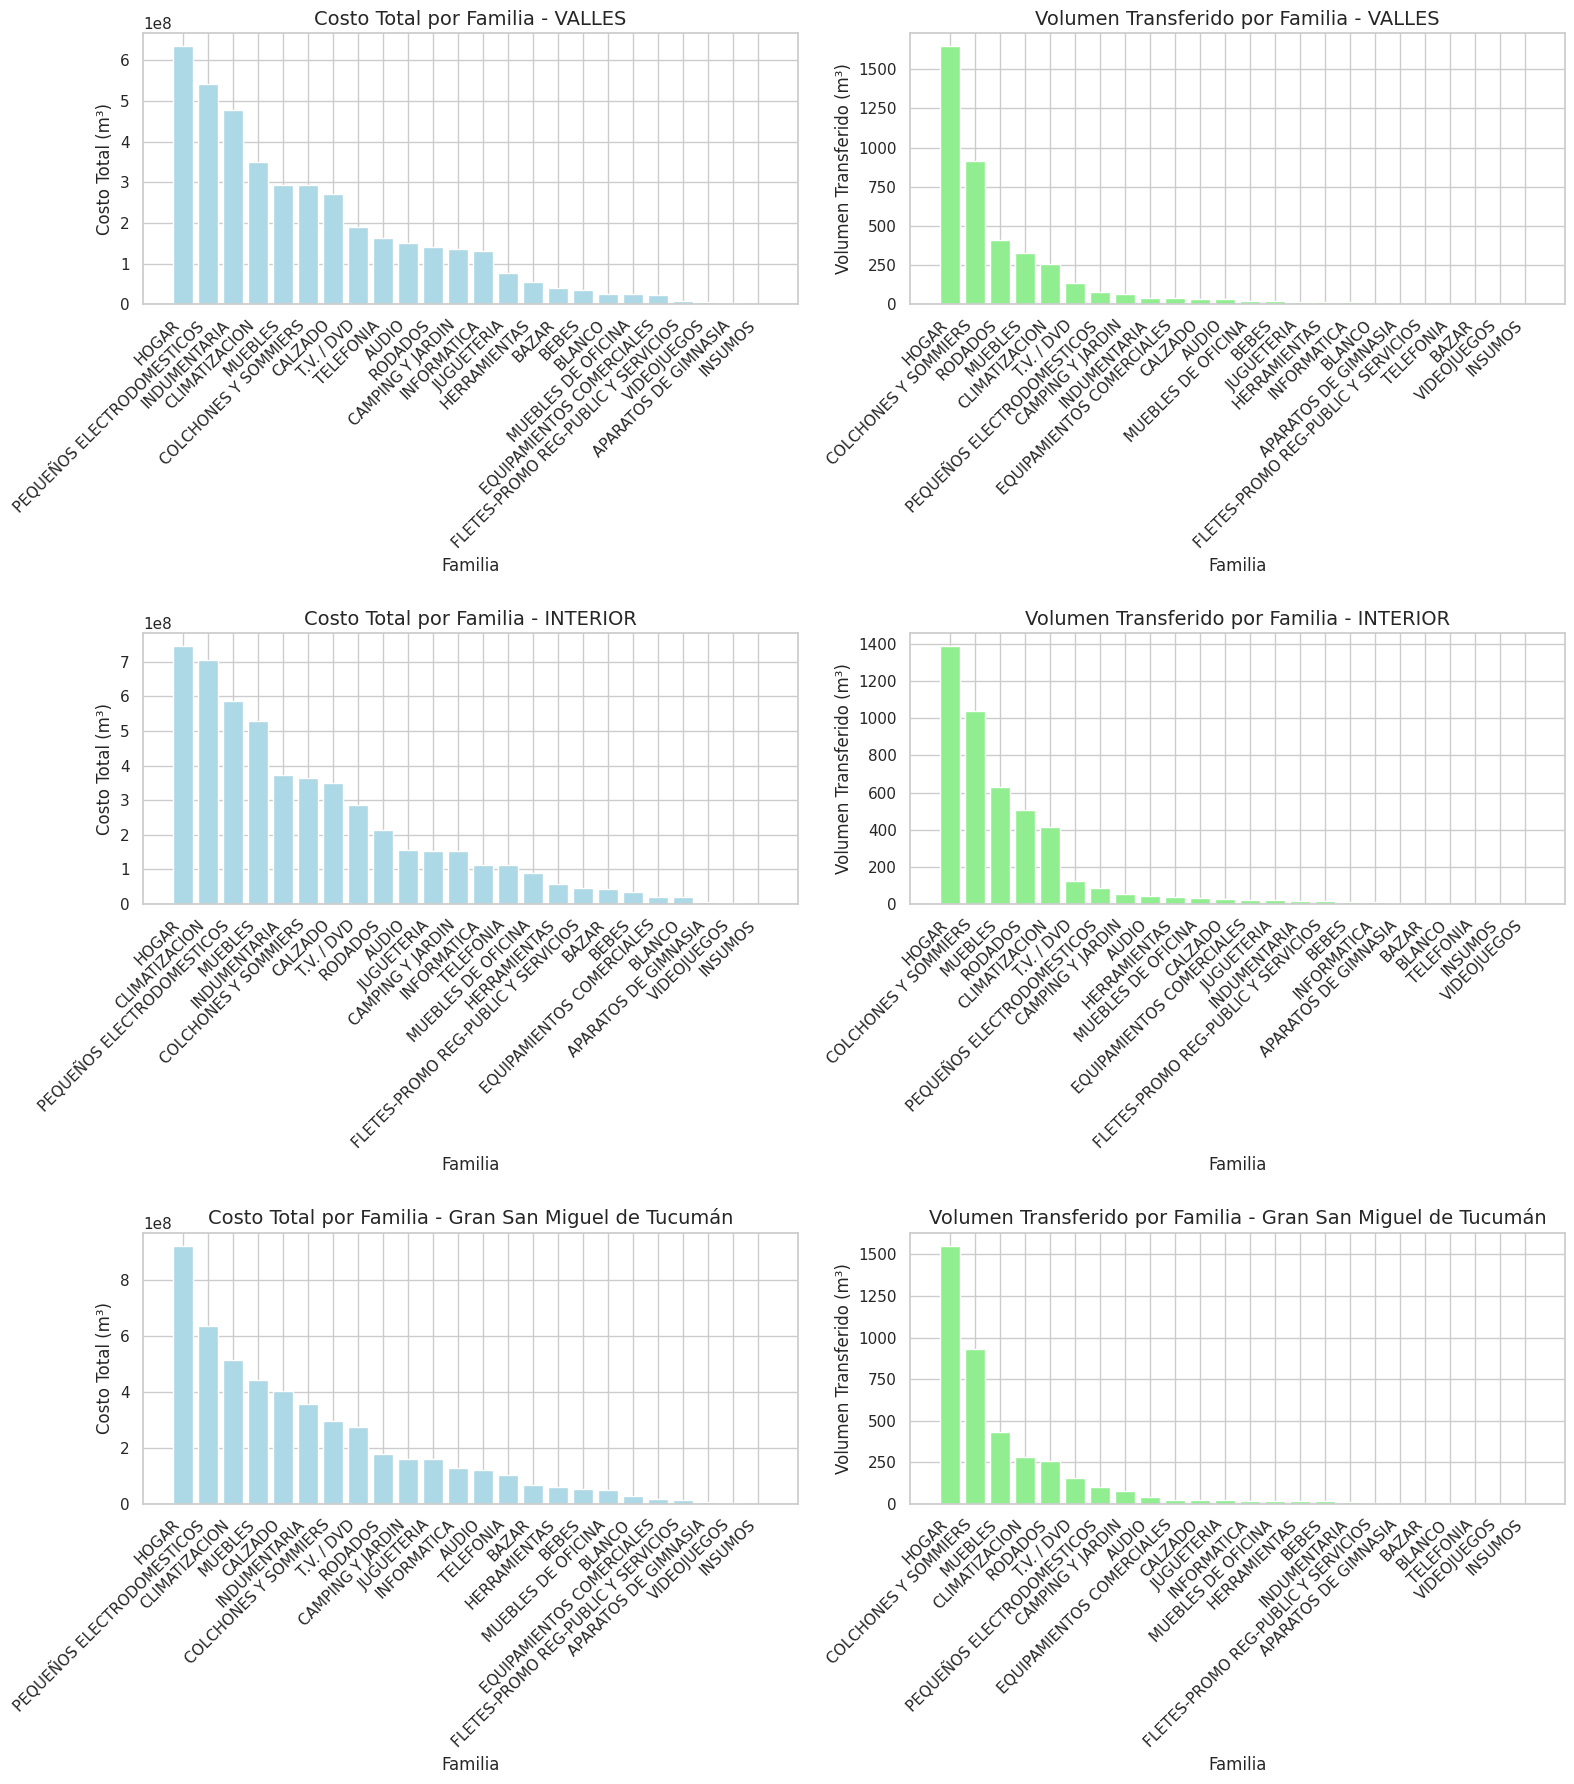

In [13]:
# Filtrar los valores NaN en la columna 'Region'
df_filtrado_sin_nulos = df_filtrado[df_filtrado['Region'].notna()]

# Lista de regiones
regiones = df_filtrado_sin_nulos['Region'].unique()

# Crear subgráficos para cada región
fig, axs = plt.subplots(len(regiones), 2, figsize=(16, 6*len(regiones)))

# Asegurarse de que axs sea un array (si solo hay 1 subplot, se convierte en un objeto único)
if len(regiones) == 1:
    axs = [axs]

# Recorrer cada región
for i, region in enumerate(regiones):
    # 1. Filtrar las transferencias para la región
    df_region = df_filtrado_sin_nulos[df_filtrado_sin_nulos['Region'] == region]

    # 2. Cálculo del costo total por familia
    costo_familia = df_region.groupby('Familia')['Costo Total'].sum().sort_values(ascending=False).reset_index()

    # 3. Cálculo del volumen total por familia
    volumen_familia = df_region.groupby('Familia')['Volumen'].sum().sort_values(ascending=False).reset_index()

    # 4. Gráfico 1: Costo total de las transferencias por familia
    ax1 = axs[i, 0]
    ax1.bar(costo_familia['Familia'], costo_familia['Costo Total'], color='lightblue')
    ax1.set_title(f'Costo Total por Familia - {region}', fontsize=14)
    ax1.set_xlabel('Familia', fontsize=12)
    ax1.set_ylabel('Costo Total (m³)', fontsize=12)

    # Establecer ticks y etiquetas para el gráfico de costo
    ax1.set_xticks(range(len(costo_familia)))  # Establecemos los ticks en función de la cantidad de familias
    ax1.set_xticklabels(costo_familia['Familia'], rotation=45, ha='right')
    ax1.grid(True, axis='y')

    # 5. Gráfico 2: Volumen transferido por familia
    ax2 = axs[i, 1]
    ax2.bar(volumen_familia['Familia'], volumen_familia['Volumen'], color='lightgreen')
    ax2.set_title(f'Volumen Transferido por Familia - {region}', fontsize=14)
    ax2.set_xlabel('Familia', fontsize=12)
    ax2.set_ylabel('Volumen Transferido (m³)', fontsize=12)

    # Establecer ticks y etiquetas para el gráfico de volumen
    ax2.set_xticks(range(len(volumen_familia)))  # Establecemos los ticks en función de la cantidad de familias
    ax2.set_xticklabels(volumen_familia['Familia'], rotation=45, ha='right')
    ax2.grid(True, axis='y')

plt.tight_layout()
plt.show()

In [14]:
print(df.columns)

Index(['Fecha', 'Hora', 'Comprobante', 'Origen', 'Destino', 'Estado',
       'Emitido por', 'Codigo', 'Articulo', 'Modelo', 'Cantidad',
       'Costo Unit.', 'Costo Total', 'Tipo de envio', 'Dia', 'Camion',
       'Volumen', 'Peso', 'Familia', 'Rubro', 'Proveedor'],
      dtype='object')


In [15]:
#CALCULOS AUXILIARES DE ANÁLISIS

# 1. Resumen estadístico del Volumen Semanal
volumen_semanal = df_filtrado.groupby('Semana_Año')['Volumen'].sum()

print("Resumen Volumen Semanal:")
print(volumen_semanal.describe())

# 2. Resumen estadístico general de Volumen
print("\nResumen General de Volumen:")
print(df['Volumen'].describe())

# 3. Resumen estadístico general de Costo Total
print("\nResumen General de Costo Total:")
print(df['Costo Total'].describe())

# 4. Correlación Volumen vs Costo Total
correlacion_volumen_costo = df['Volumen'].corr(df['Costo Total'])
print("\nCorrelación Volumen vs Costo Total:", correlacion_volumen_costo)

# 5. Resumen estadístico del Costo Unitario
print("\nResumen Costo Unitario:")
print(df['Costo Unit.'].describe())

# 6. Correlación Peso vs Volumen
correlacion_peso_volumen = df['Peso'].corr(df['Volumen'])
print("\nCorrelación Peso vs Volumen:", correlacion_peso_volumen)

print("\nCorrelación Peso vs Volumen:", correlacion_peso_volumen)

Resumen Volumen Semanal:
count      52.000000
mean      264.326998
std       481.750451
min         0.553500
25%        12.503475
50%        70.221500
75%       276.008875
max      2015.444300
Name: Volumen, dtype: float64

Resumen General de Volumen:
count    119760.000000
mean          0.133170
std           0.249298
min           0.000100
25%           0.006900
50%           0.035000
75%           0.128600
max           7.650000
Name: Volumen, dtype: float64

Resumen General de Costo Total:
count    1.197600e+05
mean     1.590982e+05
std      3.594593e+05
min     -1.266000e+03
25%      3.335211e+04
50%      7.359817e+04
75%      1.948845e+05
max      9.516666e+07
Name: Costo Total, dtype: float64

Correlación Volumen vs Costo Total: 0.04365121991094663

Resumen Costo Unitario:
count    1.197600e+05
mean     1.163747e+05
std      1.694977e+05
min      0.000000e+00
25%      2.387578e+04
50%      4.997368e+04
75%      1.367905e+05
max      3.469339e+06
Name: Costo Unit., dtype: float64

# ***ANÁLISIS DE DATOS***

#  Análisis e Interpretación de los Gráficos y Datos

---

## 1. Evolución Semanal del Volumen Transferido

El análisis de la evolución semanal del volumen transferido muestra una tendencia claramente **ascendente** en el segundo semestre del año, después de un primer semestre con muy baja actividad.

> Esta caída inicial se atribuye al **contexto económico del país**, que impactó negativamente en el consumo y la actividad comercial del sector durante los primeros seis meses.

**Datos relevantes:**
- Volumen medio semanal: **306,7 m³**.
- Volumen mínimo semanal: **0,67 m³**.
- Volumen máximo semanal: **2.284,28 m³**.

Este comportamiento confirma que **el volumen transferido fue altamente estacional**, afectado por variables macroeconómicas.

---

## 2. Análisis del Volumen Transferido General por Comprobante

A nivel de operaciones individuales, el volumen transferido por movimiento es significativamente menor, lo que muestra la granularidad de las transferencias.

**Datos relevantes:**
- Volumen medio por operación: **0,133 m³**.
- Volumen máximo registrado en una operación: **7,65 m³**.

Esto indica que **la mayoría de los comprobantes involucran volúmenes relativamente bajos**, con algunas operaciones puntuales de mayor volumen.

---

## 3. Análisis del Costo Total

El comportamiento del costo total refleja una gran dispersión entre las operaciones, con valores que van desde montos negativos (ajustes o devoluciones) hasta cifras muy elevadas.

**Datos relevantes:**
- Costo Total medio: **$159.098**.
- Costo Total máximo: **$95.166.660**.
- Alto desvío estándar: **$359.459**.

Este nivel de dispersión sugiere que **existen operaciones de gran volumen económico**, probablemente asociadas a productos de alto valor.

---

## 4. Relación entre Volumen y Costo Total

El coeficiente de correlación entre el volumen transferido y el costo total es de **0,044**, indicando una **relación prácticamente nula** entre ambas variables.

> Esto significa que **el costo de los productos transferidos no depende directamente del volumen físico**, sino más probablemente del valor unitario de los mismos.

Este hallazgo refuta parcialmente la hipótesis inicial de que **el volumen y el costo estarían estrechamente relacionados**.

---

## 5. Distribución del Costo Unitario

La distribución del costo unitario evidencia una **alta asimetría positiva**, con una gran cantidad de productos de bajo costo y unos pocos productos de altísimo valor.

**Datos relevantes:**
- Costo Unitario medio:  116.375 $

- Costo Unitario máximo: 3.469.339 $.

La gran dispersión confirma la existencia de **productos premium o de alto ticket**, que elevan significativamente los promedios.

---

## 6. Relación entre Peso y Volumen

El coeficiente de correlación entre el peso y el volumen transferido es de **0,525**, indicando una **correlación moderada positiva**.

> A mayor volumen, en general, se transfiere mayor peso, aunque la relación no es perfectamente proporcional debido a diferencias de densidad entre productos.

Esto valida la hipótesis de que **el tipo de producto (y su densidad) impacta directamente en la logística y en la planificación de envíos**.

---

#  Principales Insights Obtenidos

- La baja actividad del primer semestre refleja el **impacto macroeconómico nacional**.
- **La mayoría de los comprobantes** involucran volúmenes y montos pequeños, pero por lo general una operación involucra varios comprobantes, lo que habla de una ineficiencia administrativa.
- **No existe una relación directa** entre volumen físico y costo total, lo que refleja la **heterogeneidad de los productos**.
- **El Costo Unitario** presenta **una amplia dispersión**, afectado por productos de muy alto valor.
- **Peso y Volumen** se encuentran **moderadamente correlacionados**, aunque no de forma perfecta.

---

#  Notas metodológicas

Este análisis se realizó utilizando exclusivamente los datos numéricos disponibles en el dataset, sin añadir variables adicionales artificiales.

---





 ---------------------------------------------------------------------------------------------------

# ***Análisis de hipotesis y conclusiones finales***


## 1. ¿Cómo evoluciona el volumen transferido a lo largo del año?

- **Visualización**: Gráfico de evolución semanal del volumen transferido.
- **Análisis numérico**: Volumen medio semanal de **306,7 m³**, con un crecimiento notorio en el segundo semestre.
- **Interpretación**: Se identificó una **baja actividad en el primer semestre**, atribuible al **contexto económico nacional** adverso, con una recuperación progresiva en el segundo semestre, validando la hipótesis de estacionalidad.

---

## 2. ¿Qué características tienen los costos unitarios de los productos transferidos?

- **Visualización**: Distribución del costo unitario.
- **Análisis numérico**: Media de **$116.375**, con alta asimetría positiva.
- **Interpretación**: Se confirma que **existe una amplia dispersión en los costos unitarios**, predominando productos de bajo valor y algunos productos premium que elevan el promedio.

---

## 3. ¿Existe relación entre el volumen transferido y el costo total?

- **Visualización**: Gráfico de dispersión volumen vs costo total.
- **Análisis numérico**: Correlación de **0,044** (prácticamente nula).
- **Interpretación**: Se refuta parcialmente la hipótesis inicial, evidenciando que **el costo total no depende directamente del volumen transferido**, sino del valor unitario de los productos.

---

## 4. ¿Existe relación entre peso y volumen transferido?

- **Visualización**: Gráfico de dispersión peso vs volumen.
- **Análisis numérico**: Correlación moderada positiva de **0,525**.
- **Interpretación**: Se valida que **a mayor volumen generalmente se transfiere mayor peso**, aunque la relación no es estrictamente proporcional debido a las diferencias en la densidad de los productos.

---

#  13. Conclusión Final basada en los Insights Obtenidos

---

El análisis de los datos permitió obtener una visión detallada del comportamiento de las transferencias a lo largo del año.  
Se observó que el **primer semestre** estuvo caracterizado por **baja actividad**, atribuida a factores macroeconómicos, con una recuperación sostenida en la segunda mitad del año.

A nivel de operaciones, el volumen transferido por **comprobante** es generalmente bajo, aunque una operación puede involucrar varios comprobantes, evidenciando una **posible ineficiencia administrativa** en el proceso de gestión documental.

Respecto a los costos, el **costo unitario** de los productos muestra una **dispersión significativa**, lo que refleja la coexistencia de productos de bajo valor junto con productos de muy alto ticket.

Por otro lado, **no existe una relación directa entre volumen físico y costo total**, reforzando la idea de heterogeneidad en los productos transferidos.  
La **correlación moderada entre peso y volumen** valida la hipótesis de que las características físicas de los productos son un factor relevante en la logística de las transferencias.

Estos hallazgos proporcionan una base sólida para identificar oportunidades de **optimización administrativa** y para perfeccionar **la planificación logística** basada en las características reales de los productos.

---




In [16]:
print(df_region.columns)

Index(['Fecha', 'Hora', 'Comprobante', 'Origen', 'Destino', 'Estado',
       'Emitido por', 'Codigo', 'Articulo', 'Modelo', 'Cantidad',
       'Costo Unit.', 'Costo Total', 'Tipo de envio', 'Dia', 'Camion',
       'Volumen', 'Peso', 'Familia', 'Rubro', 'Proveedor', 'Region',
       'Dia_Semana', 'Semana_Año'],
      dtype='object')
